In [65]:
import numpy as np
from numpy.random import default_rng
import pandas as pd

from sklearn.datasets import make_classification, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(suppress=True, precision=3)
#plt.style.use('seaborn') # pretty matplotlib plots

# PART TWO: Trousers v Dresses


In [62]:
#import data using dataframe

xtest_df = pd.read_csv('./data_trouser_dress/troudress_test_x.csv')
xtrain_df = pd.read_csv('./data_trouser_dress/troudress_train_x.csv')
ytrain_df = pd.read_csv('./data_trouser_dress/troudress_train_y.csv')


In [143]:
xtrain_df.describe()

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.199833,0.200458,0.198142,0.198708,0.197985,0.195888,0.193613,0.191265,0.191806,0.204522,...,0.270179,0.211098,0.197858,0.190702,0.197869,0.193569,0.198039,0.198022,0.194575,0.200590
std,0.399892,0.400334,0.398565,0.398902,0.397590,0.395864,0.392681,0.387899,0.378332,0.342972,...,0.313774,0.346535,0.374340,0.384068,0.394520,0.393200,0.397924,0.398306,0.395813,0.400451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.146800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017200,0.270600,...,0.474500,0.303100,0.113700,0.004100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
ytrain_df.describe()

,is_trousers
count,12000.000000
mean,0.500000
std,0.500021
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [146]:
xtrain_df.head()

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0522,...,0.0000,0.0,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,...,0.0040,0.0,1.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0000,...,0.0000,1.0,0.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0080,...,0.3255,0.0,0.0078,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0000,...,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
ytrain_df.head()

,is_trousers
0,0
1,1
2,1
3,0
4,1


## logistic regression with base data using only test train split


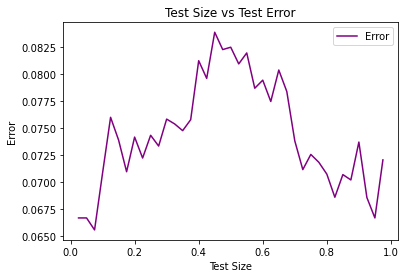

In [63]:
train_accuracy = list()
loss = list()
error = list()

size = np.linspace(0.025,1, 39, endpoint = False)
#print(size)

#graph test_size vs error for test size from 0-1 
for i in size:
    X_train, X_test, y_train, y_test = train_test_split(xtrain_df, ytrain_df, test_size = i, random_state = 0)
    logmodel = LogisticRegression(max_iter=10_000)
    logmodel.fit(X_train, y_train.values.ravel())
    error.append(1 - logmodel.score(X_test, y_test))

    y_prob = logmodel.predict_proba(X_train)
    loss.append(log_loss(y_train, y_prob))

    
plt.plot(size, error, color='purple', label='Error')
#plt.plot(size, loss, color='teal', label='Loss')
plt.title('Test Size vs Test Error')
plt.xlabel('Test Size')
plt.ylabel('Error')
plt.legend()
plt.show()    
    


In [64]:
#Binary classification solver example
#compare different solvers

from sklearn.model_selection import GridSearchCV

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
#log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=9)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

NameError: name 'log_reg' is not defined

Train error:  0.023541666666666683
Test Error:  0.026249999999999996
Log loss:  0.08614988030542735


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


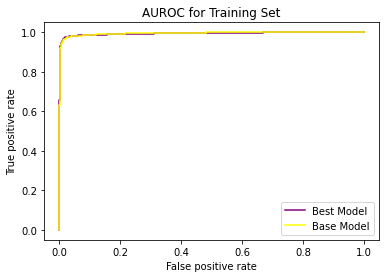

[[1169   16]
 [  47 1168]]


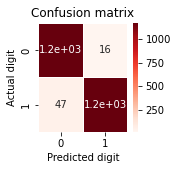

In [78]:
#fit baseline model using 0.2 test size
X_train, X_test, y_train, y_test = train_test_split(x_train_nw, ytrain_df, test_size = 0.2, random_state = 0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(xtrain_df, ytrain_df, test_size = 0.2, random_state = 0)

#logmodel = LogisticRegression()
logmodel = LogisticRegression(solver = 'liblinear', penalty = 'l2', C = 0.03162277660168379)
logmodel.fit(X_train, y_train.values.ravel())  

basemodel = LogisticRegression()
basemodel.fit(X_train1, y_train1.values.ravel())  

#output predictions to .txt 
yproba1_test = logmodel.predict_proba(x_test_nw)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

#train test performance stats
pred_train = logmodel.predict(X_train)
print("Train error: ", 1 - accuracy_score(pred_train, y_train))

#basic model metrics for performance
y_prob = logmodel.predict_proba(X_train)
y_prob1 = basemodel.predict_proba(X_train1)

error = 1 - logmodel.score(X_test, y_test)
print('Test Error: ', error)
print('Log loss: ', log_loss(y_train, y_prob))

#ROC curve
probs_class1 = y_prob[:,1]
probs_class1_base = y_prob1[:,1]

#auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, color='purple', label='Best Model')

fpr1, tpr1, thresholds1 = roc_curve(y_train1, probs_class1_base)
plt.plot(fpr1, tpr1, color='yellow', label='Base Model')


#plt.title('AUROC = %.3f' % auroc)
plt.title('AUROC for Training Set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

#confusion matrix
predictions = logmodel.predict(X_test)
conf_matrix = confusion_matrix(y_test.values.ravel(), predictions)
print(conf_matrix)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()




KeyError: 0

In [166]:
C_grid = np.logspace(-9, 6, 31)
C_grid

array([      0.   ,       0.   ,       0.   ,       0.   ,       0.   ,
             0.   ,       0.   ,       0.   ,       0.   ,       0.   ,
             0.   ,       0.   ,       0.001,       0.003,       0.01 ,
             0.032,       0.1  ,       0.316,       1.   ,       3.162,
            10.   ,      31.623,     100.   ,     316.228,    1000.   ,
          3162.278,   10000.   ,   31622.777,  100000.   ,  316227.766,
       1000000.   ])

The C value that gives the least loss: 0.03162277660168379
The error rate of the model with that C value:  0.05166666666666664
Train error:  0.04791666666666672
[[1149   36]
 [  79 1136]]


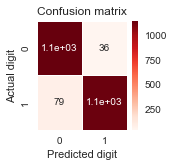

Test error:  0.04791666666666672
Log loss:  0.16159839182723337


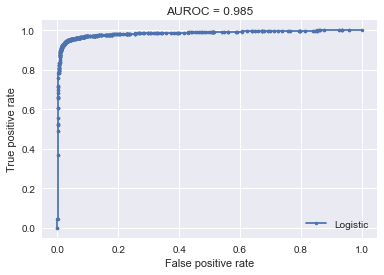

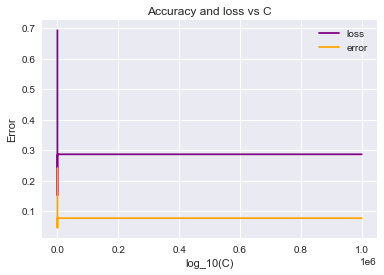

In [181]:
#find the optimal max_iteration/hyperparameters

train_accuracy = list()
error = list()
weights = list()
c_values = list()
accuracy2 = list()
loss2 = list()

X_train, X_test, y_train, y_test = train_test_split(xtrain_df, ytrain_df, test_size = 0.2, random_state = 0)

C_grid = np.logspace(-9, 6, 31)
for C in C_grid:                # Build and evaluate model for each value C
    c_values.append(C)
    clf = LogisticRegression(solver='liblinear', C = C)  #default penalty is l2
    clf.fit(X_train, y_train.values.ravel())
    accuracy2.append(clf.score(X_test, y_test))
    error.append(1 - clf.score(X_test, y_test))
       
    y_prob = clf.predict_proba(X_test)  
    loss2.append(log_loss(y_test, y_prob))

min_loss_index = loss2.index(min(loss2))
best_c = c_values[min_loss_index]
print('The C value that gives the least loss:', best_c)
print('The error rate of the model with that C value: ', 1 - accuracy2[min_loss_index])
 
    
#regression using the best c value
clf = LogisticRegression(solver='liblinear', C = best_c, penalty = 'l1')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Train error: ", 1 - accuracy_score(predictions, y_test))

#conf matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()

#basic model metrics for performance
y_prob = clf.predict_proba(X_train)
print('Test error: ', 1 - clf.score(X_test, y_test))
print('Log loss: ', log_loss(y_train, y_prob))

#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

#C
plt.xlabel('log_10(C)');
plt.ylabel('Error');
plt.plot(C_grid, loss2, color='purple', label='loss')
plt.plot(C_grid, error, color='orange', label='error')
plt.title('Accuracy and loss vs C')
plt.legend()
plt.show()

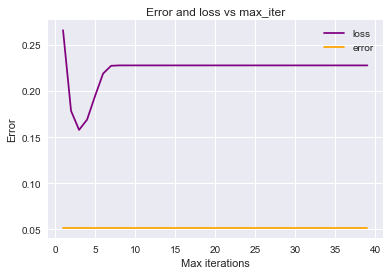

In [180]:
#find the optimal max_iteration

train_accuracy = list()
error = list()
c_values = list()
accuracy2 = list()
loss = list()

X_train, X_test, y_train, y_test = train_test_split(xtrain_df, ytrain_df, test_size = 0.2, random_state = 0)

arr = list(range(1, 40))
for i in arr:    
    #model = LogisticRegression(solver='liblinear', C = 0.03162277660168379, max_iter = i)
    model = LogisticRegression(solver='liblinear', max_iter = i)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    error.append(1 - clf.score(X_test, y_test))

    y_prob = model.predict_proba(X_test)  
    loss.append(log_loss(y_test, y_prob))


#C
plt.xlabel('Max iterations');
plt.ylabel('Error');
plt.plot(arr, loss, color='purple', label='loss')
plt.plot(arr, error, color='orange', label='error')
plt.title('Error and loss vs max_iter')
plt.legend()
plt.show()

## now try doing the same but with minmax scalar---got exactly same accuracy

In [128]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

logmodel.fit(X_scaled_train, y_train)
pred_train = logmodel.predict(X_scaled_train)
pred_test = logmodel.predict(X_scaled_test)

acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print("Train accuracy: ", acc_train)
print("Test accuracy: ", acc_test)


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train accuracy:  0.9777363184079602
Test accuracy:  0.9232323232323232


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## classify with base data, k fold CV
plot error rate on baseline models vs number of folds (0-20) 

Having a lower K means less variance and thus, more bias, while having a higher K means more variance and thus, and lower bias.

In [101]:
arr = list(range(2, 20))
arr

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

-----------------
Classify with base data, k folds
-----------------


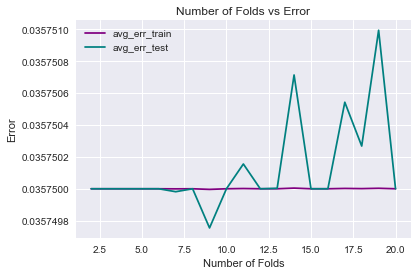

In [155]:
#import warnings
#warnings.filterwarnings('ignore')

print("-----------------\nClassify with base data, k folds\n-----------------")

X = np.array(xtrain_df)
y = np.array(ytrain_df.values.ravel())

avg_err_train = list()
avg_err_test = list()

arr = list(range(2, 21))

for k in arr:
    
    kfold = KFold(n_splits = k)
    train_scores = []
    test_scores = []
    model = LogisticRegression()

    for train_idx, test_idx in kfold.split(xtrain_df):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred_train = logmodel.predict(X_train)
        pred_test = logmodel.predict(X_test)

        acc_train = accuracy_score(pred_train, y_train)
        acc_test = accuracy_score(pred_test, y_test)

        train_scores.append(acc_train)
        test_scores.append(acc_test)
    
    avg_err_train.append(1 - np.average(train_scores))
    avg_err_test.append(1 - np.average(test_scores))

    
plt.plot(arr, avg_err_train, color='purple', label='avg_err_train')
plt.plot(arr, avg_err_test, color='teal', label='avg_err_test')
plt.title('Number of Folds vs Error')
plt.xlabel('Number of Folds')
plt.ylabel('Error')
plt.legend()
plt.show()    



-----------------
Classify with base data, 9 folds
-----------------

Average train error:  0.03041665761120782
Average test error:  0.0640000704823882
Log loss:  0.0911374038860614


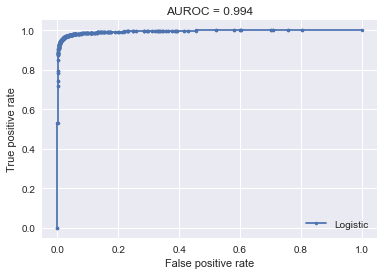

In [156]:
print("-----------------\nClassify with base data, 9 folds\n-----------------")

X = np.array(xtrain_df)
y = np.array(ytrain_df.values.ravel())

k = 9
kfold = KFold(n_splits=k)
train_scores = []
test_scores = []
loss = []
y_proba_list = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    
    train_scores.append(acc_train)
    test_scores.append(acc_test)

    y_prob = model.predict_proba(X_train)
    loss.append(log_loss(y_train, y_prob))
    
    yproba1_test = logmodel.predict_proba(xtest_df)[:, 1]
    y_proba_list.append(yproba1_test)
 

#QUestion::output result should be the average of all folds???

avg_y_proba = []
avg_y_proba = np.average(y_proba_list, axis=0)    # 2d array column average
np.savetxt('yproba1_test.txt', avg_y_proba)
 

print("\nAverage train error: ", 1 - np.average(train_scores))
print("Average test error: ", 1 - np.average(test_scores))
print('Log loss: ', np.average(loss))


#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

In [134]:
print("-----------------\nClassify with scaled data, 5 folds\n-----------------")

X_scaled = MinMaxScaler().fit_transform(X)

train_scores = []
test_scores = []

for train_idx, test_idx in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_idx,:], X_scaled[test_idx,:]
    y_train, y_test = y[train_idx], y[test_idx]
    
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    print("Train accuracy: ", acc_train)
    print("Test accuracy: ", acc_test)
    
    train_scores.append(acc_train)
    test_scores.append(acc_test)
    
print("\nAverage train accuracy: ", np.average(train_scores))
print("Average test accuracy: ", np.average(test_scores))

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was ex

Train accuracy:  0.9721875
Test accuracy:  0.9275


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train accuracy:  0.971875
Test accuracy:  0.9341666666666667


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train accuracy:  0.970625
Test accuracy:  0.93625


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train accuracy:  0.9707291666666666
Test accuracy:  0.9354166666666667
Train accuracy:  0.9716666666666667
Test accuracy:  0.93875

Average train accuracy:  0.9714166666666667
Average test accuracy:  0.9344166666666667


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## logistic regreswsion using filtered data

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy:  0.9737562189054726
Test accuracy:  0.9340909090909091
score:  0.9737562189054726
log loss:  0.07601118355933302


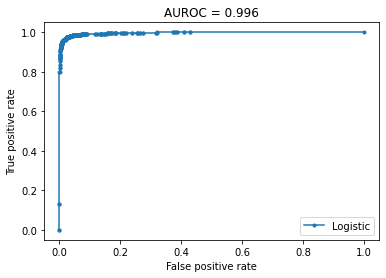

In [126]:
#doing the same as above but using filtered data

#1 split
X_train, X_test, y_train, y_test = train_test_split(new_x_train, ytrain_df, test_size = 0.33, random_state = 0)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train.values.ravel())

#output predictions to .txt 
yproba1_test = logmodel.predict_proba(xtest_df)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

#train test performance stats
pred_train = logmodel.predict(X_train)
pred_test = logmodel.predict(X_test)
print("Train accuracy: ", accuracy_score(pred_train, y_train))
print("Test accuracy: ", accuracy_score(pred_test, y_test))


y_pred = logmodel.predict(X_train)
y_prob = logmodel.predict_proba(X_train)
print('score: ', logmodel.score(X_train, y_train))
print('log loss: ', log_loss(y_train, y_prob))

#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

## (repeated) k-fold cross-validation

In [42]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, xtrain_df, ytrain_df, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Accuracy: 0.937 (0.005)


In [44]:
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
model = LogisticRegression()
scores = cross_val_score(model, xtrain_df, ytrain_df, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))



Accuracy: 0.936 (0.008)


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was ex

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was ex

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was ex

--------------------------------------------------------------------

In [4]:
# Load the x-data and y-class arrays
x_test = np.loadtxt('./data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)
x_train = np.loadtxt('./data_trouser_dress/troudress_train_x.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_trouser_dress/troudress_train_y.csv', delimiter=',', skiprows=1)


In [10]:
x_train.shape, y_train.shape, x_test.shape


((12000, 784), (12000,), (2000, 784))

In [87]:

print("x_train")
print("mean: ", x_train.mean())
print("standard deviation: ",x_train.std())
print("min: ", x_train.min())
print("max: ", x_train.max())  


x_train
mean:  0.31493749522746645
standard deviation:  0.4087038980365875
min:  0.0
max:  1.0


## reduce noise using median_filter


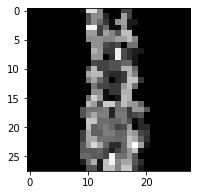

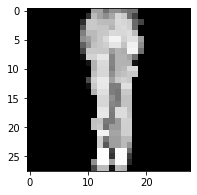

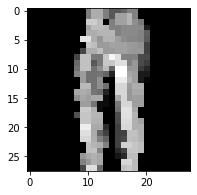

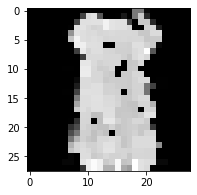

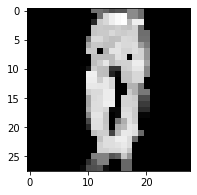

In [42]:
from scipy import ndimage

filtered_x_train = list()
filtered_x_test = list()

for i in range(len(x_train)):
    im = np.reshape(x_train_nw[i],(28, 28))
    blurred_im = ndimage.median_filter(im, 2)
    filtered_x_train.append(blurred_im.flatten())

for i in range(len(x_test)):
    im = np.reshape(x_test_nw[i],(28, 28))
    blurred_im = ndimage.median_filter(im, 2)
    filtered_x_test.append(blurred_im.flatten())    
    

for i in range(5):
    plt.figure(figsize=(20, 3))
    plt.imshow(np.reshape(filtered_x_train[i], (28,28)),  cmap = plt.cm.gray)
    plt.show()


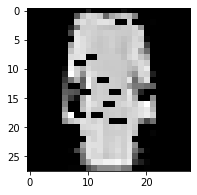

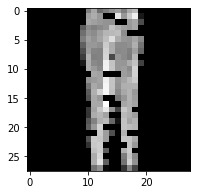

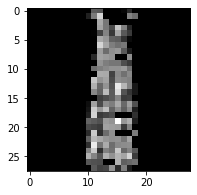

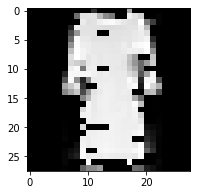

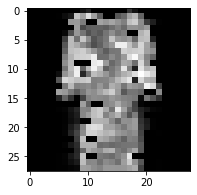

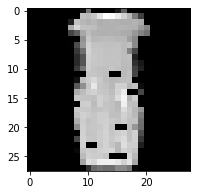

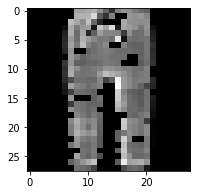

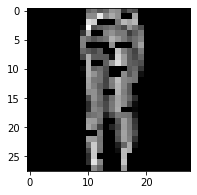

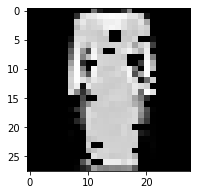

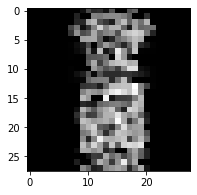

In [38]:
# if right and left pixels are both not black, replace that pixel with white

x_train_nb = x_train_nw.copy()
x_test_nb = x_test_nw.copy()

for i in range(len(x_train)):
    im = np.reshape(x_train_nb[i],(28, 28))

    for y in range(28):
        for x in range(1, 27):
            if im[y][x] == 0 and im[y][x+1] != 0 and im[y][x-1] != 0:
                im[y][x] = (im[y][x+1] + im[y][x-1])/2
                
for i in range(len(x_test_nb)):
    im = np.reshape(x_test_nb[i],(28, 28))

    for y in range(28):
        for x in range(1, 27):
            if im[y][x] == 0 and im[y][x+1] != 0 and im[y][x-1] != 0:
                im[y][x] = (im[y][x+1] + im[y][x-1])/2                
                
                
for i in range(10):
    plt.figure(figsize=(20, 3))
    plt.imshow(np.reshape(x_test_nb[i], (28,28)),  cmap = plt.cm.gray)
    plt.show()

## replace white pixels into black to identify the outline better
pixel color:
white = 1.0
black = 0.0

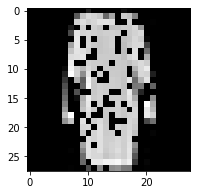

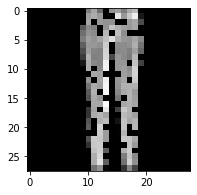

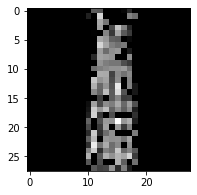

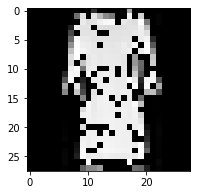

In [25]:
x_train_nw = x_train.copy()
x_test_nw = x_test.copy()

for i in range(len(x_train_nw)):
    for j in range(len(x_train_nw[0])):
        if x_train_nw[i][j] == 1:
            x_train_nw[i][j] = 0
        
for i in range(len(x_test_nw)):
    for j in range(len(x_test_nw[0])):        
        if x_test_nw[i][j] == 1:
            x_test_nw[i][j] = 0
            
for i in range(4):
    plt.figure(figsize=(20, 3))
    plt.imshow(np.reshape(x_test_nw[i], (28,28)),  cmap = plt.cm.gray)
    plt.show()


## fit basic logistic model on x_train_nw data

Train accuracy:  0.98375
Test accuracy:  0.96875
Log loss:  0.05685424012418494


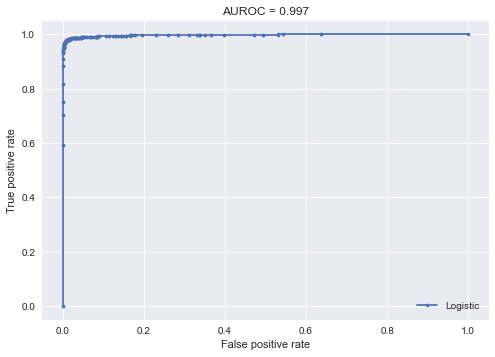

[[1168   30]
 [  45 1157]]


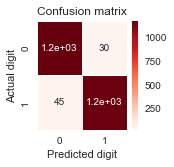

In [84]:
train_accuracy = list()
loss = list()
weights = list()

X_train, X_test, y_train, y_test = train_test_split(x_train_nw, ytrain_df, test_size = 0.2, random_state = 42)
logmodel = LogisticRegression(max_iter=10_000)
logmodel.fit(X_train, y_train.values.ravel())

#output predictions to .txt 
yproba1_test = logmodel.predict_proba(xtest_df)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

#train test performance stats
pred_train = logmodel.predict(X_train)
print("Train accuracy: ", accuracy_score(pred_train, y_train))

#basic model metrics for performance
y_prob = logmodel.predict_proba(X_train)
print('Test accuracy: ', logmodel.score(X_test, y_test))
print('Log loss: ', log_loss(y_train, y_prob))

#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

#confusion matrix
predictions = logmodel.predict(X_test)
conf_matrix = confusion_matrix(y_test.values.ravel(), predictions)
print(conf_matrix)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()


## fit basic logistic model on filtered_x_train data

Train accuracy:  0.9802083333333333
Test accuracy:  0.9670833333333333
Basic accuracy:  0.9670833333333333
Log loss:  0.06333650365000904


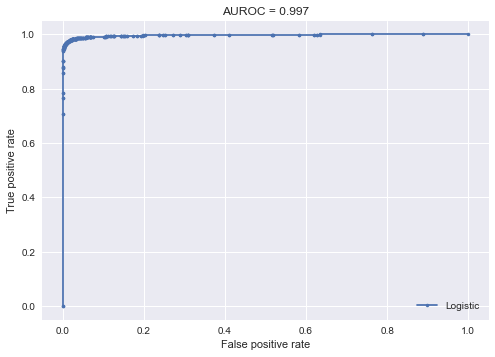

[[1153   32]
 [  47 1168]]


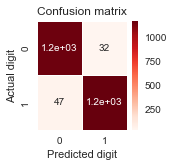

In [85]:
train_accuracy = list()
loss = list()
weights = list()

X_train, X_test, y_train, y_test = train_test_split(filtered_x_train, ytrain_df, test_size = 0.2, random_state = 0)
logmodel = LogisticRegression(max_iter=10_000)
logmodel.fit(X_train, y_train.values.ravel())

#output predictions to .txt 
yproba1_test = logmodel.predict_proba(xtest_df)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

#train test performance stats
pred_train = logmodel.predict(X_train)
pred_test = logmodel.predict(X_test)
print("Train accuracy: ", accuracy_score(pred_train, y_train))
print("Test accuracy: ", accuracy_score(pred_test, y_test))

#basic model metrics for performance
y_prob = logmodel.predict_proba(X_train)
print('Basic accuracy: ', logmodel.score(X_test, y_test))
print('Log loss: ', log_loss(y_train, y_prob))

#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

#confusion matrix
predictions = logmodel.predict(X_test)
conf_matrix = confusion_matrix(y_test.values.ravel(), predictions)
print(conf_matrix)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()


## look at average trousers and average dresses

In [ ]:
    
    
    
    #rotate_face = ndimage.rotate(im, 90)
    #plt.imshow(rotate_face,  cmap = plt.cm.gray)
    #plt.show()

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(2000,)
score:  0.9733333333333334
log loss:  0.08220474253680582


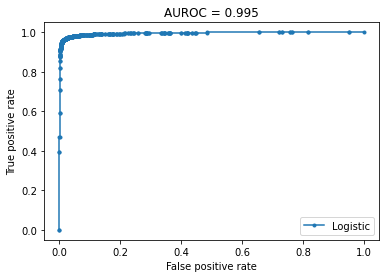

In [91]:
#train model using the reduced-noise images(new_x_train)

logmodel = LogisticRegression()
logmodel.fit(new_x_train, y_train)

yproba1_test = logmodel.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)
print(yproba1_test.shape)    #should have 2000 entries

###################
y_pred = logmodel.predict(new_x_train)
y_prob = logmodel.predict_proba(new_x_train)
print('score: ', logmodel.score(new_x_train, y_train))
print('log loss: ', log_loss(y_train, y_prob))

#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();
plt.show()

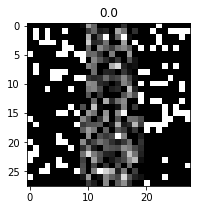

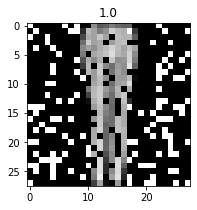

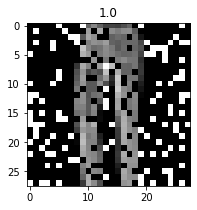

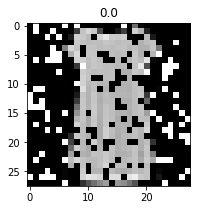

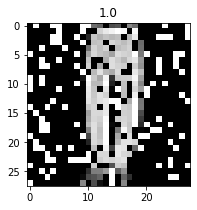

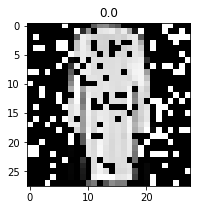

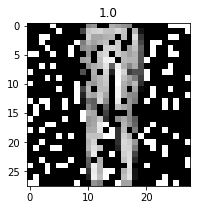

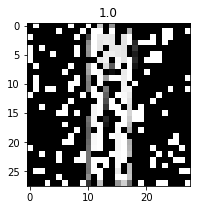

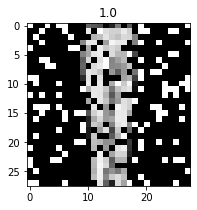

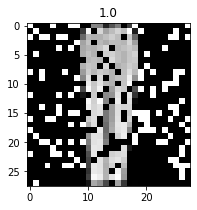

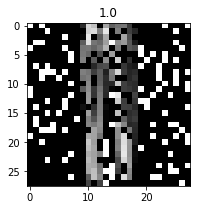

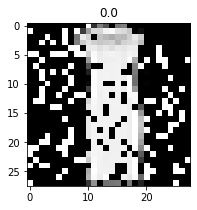

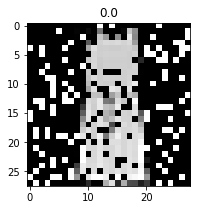

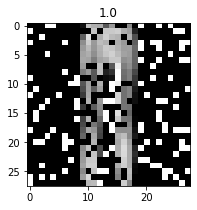

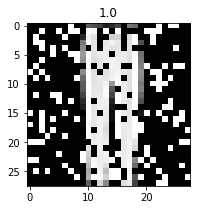

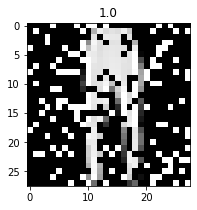

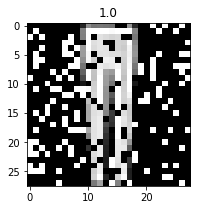

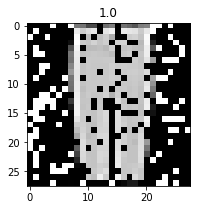

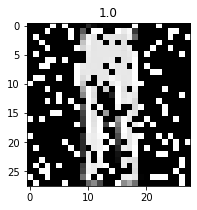

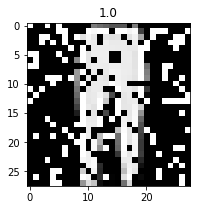

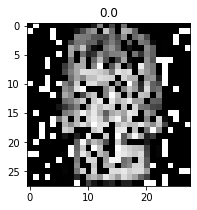

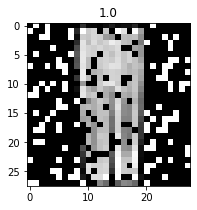

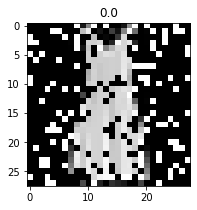

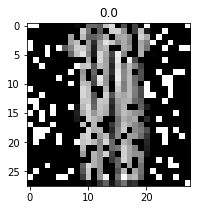

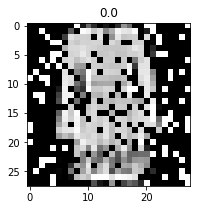

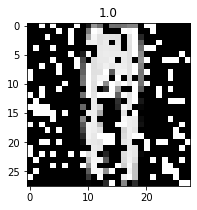

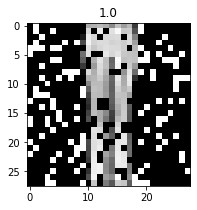

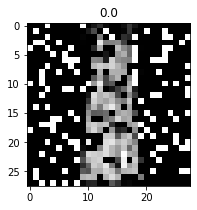

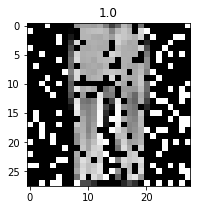

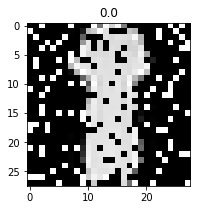

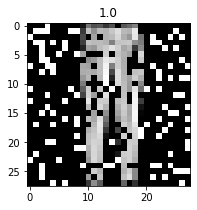

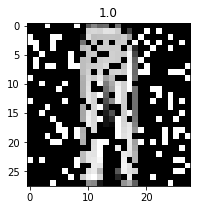

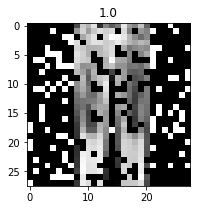

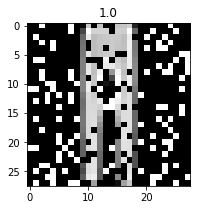

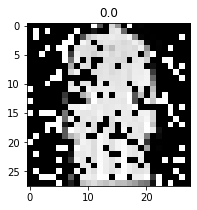

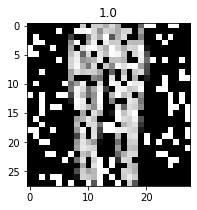

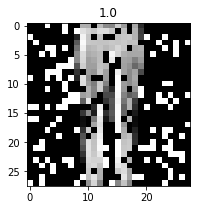

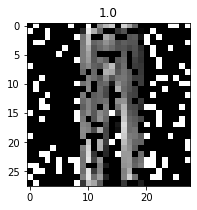

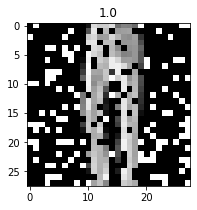

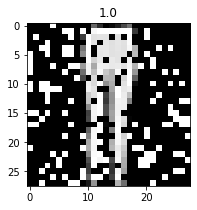

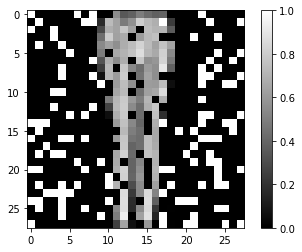

1.0


In [16]:
#look at some of the images

for i in range(40):
    plt.figure(figsize=(20, 3))
    plt.title(y_train[i])
    plt.imshow(np.reshape(x_train[i], (28,28)),  cmap = plt.cm.gray)
    plt.show()


im = plt.imshow(np.reshape(x_train[1], (28,28)),  cmap = plt.cm.gray)
plt.colorbar(im)
plt.show()

print(y_train[1])

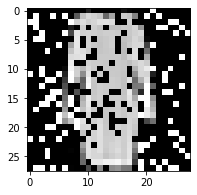

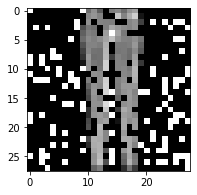

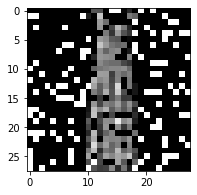

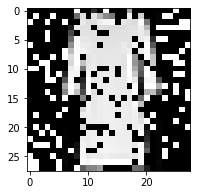

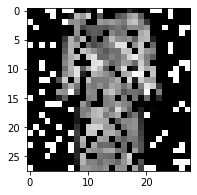

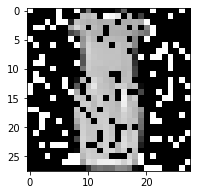

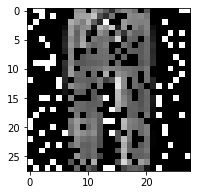

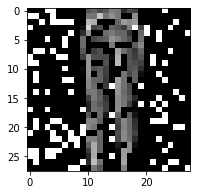

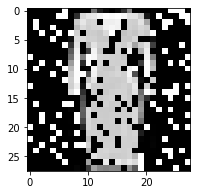

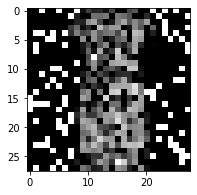

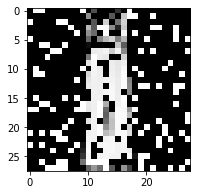

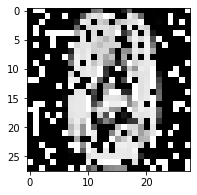

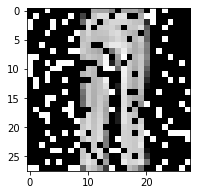

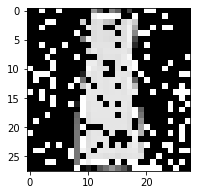

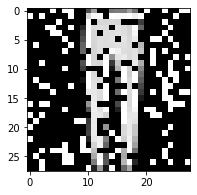

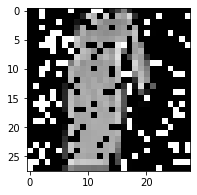

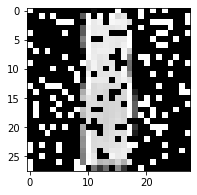

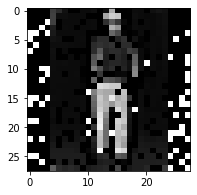

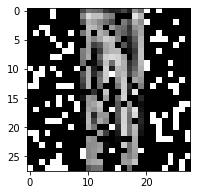

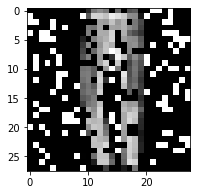

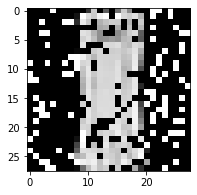

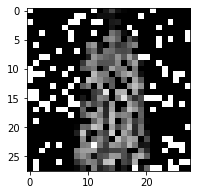

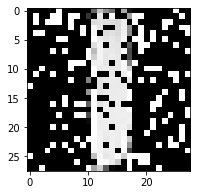

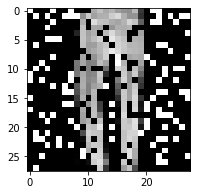

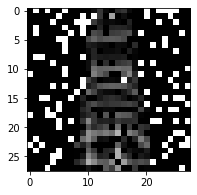

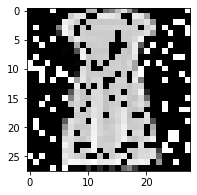

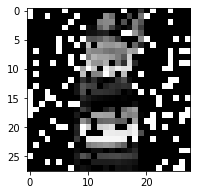

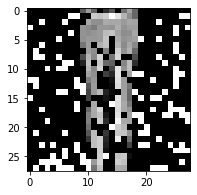

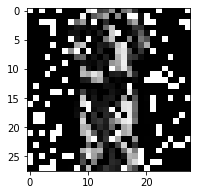

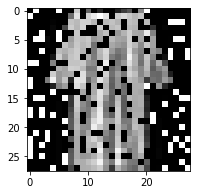

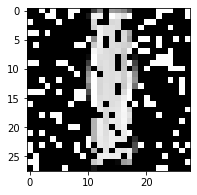

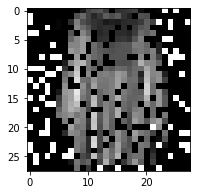

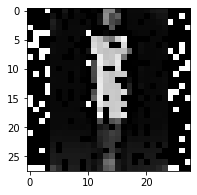

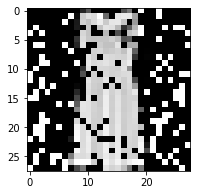

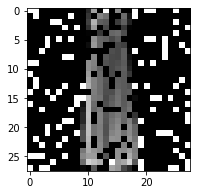

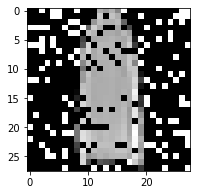

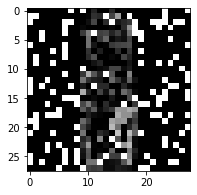

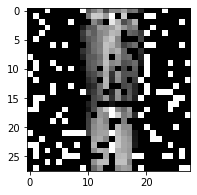

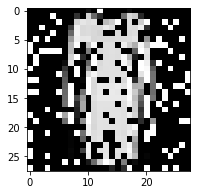

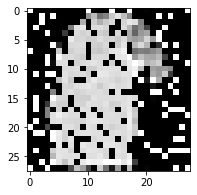

In [23]:
#look at images in x_test!!!

for i in range(40):
    plt.figure(figsize=(20, 3))
    plt.imshow(np.reshape(x_test[i], (28,28)),  cmap = plt.cm.gray)
    plt.show()



## Transform x_test too!!! Then, run our models that are trained on the same transformed features on the transformed x_test!!!




In [ ]:
#data augmentation: flip pixels across the images to create a new set of data




Do some image noise reduction!

In [21]:
#implementation of a mean filter

import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

#image = cv2.imread('AM04NES.JPG')
image2 = cv2.cvtColor(np.reshape(x_test[1], (28,28)), cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))


plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

ModuleNotFoundError: No module named 'cv2'

In [15]:
#apply minmax normalization to image data, limiting the value range between 0 and 1
# not sure if we need to do this bc our data is from 0 to 1, dividing by 255 will make them too small

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('Number of images in x_train:', x_train.shape[0])

Number of images in x_train 12000


# 0) Baseline classifier: raw pixel features, fed into a Logistic Regression classifier

You should use sklearn.linear_model.LogisticRegression

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

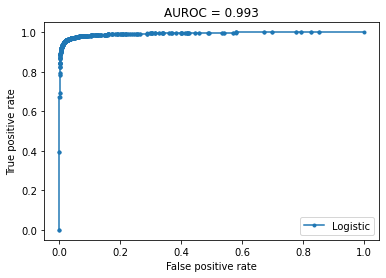

In [8]:
#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();



In [9]:
for i in range(len(fpr)):
    print("Threshold: %f, TPR: %f, FPR: %f" % (thresholds[i], tpr[i], fpr[i]))


Threshold: 2.000000, TPR: 0.000000, FPR: 0.000000
Threshold: 1.000000, TPR: 0.000167, FPR: 0.000000
Threshold: 0.999811, TPR: 0.395500, FPR: 0.000000
Threshold: 0.999810, TPR: 0.395500, FPR: 0.000167
Threshold: 0.995603, TPR: 0.670167, FPR: 0.000167
Threshold: 0.995602, TPR: 0.670167, FPR: 0.000333
Threshold: 0.993783, TPR: 0.693167, FPR: 0.000333
Threshold: 0.993748, TPR: 0.693167, FPR: 0.000500
Threshold: 0.980474, TPR: 0.784833, FPR: 0.000500
Threshold: 0.980442, TPR: 0.784833, FPR: 0.000667
Threshold: 0.977426, TPR: 0.796333, FPR: 0.000667
Threshold: 0.977371, TPR: 0.796333, FPR: 0.000833
Threshold: 0.965498, TPR: 0.823500, FPR: 0.000833
Threshold: 0.965370, TPR: 0.823500, FPR: 0.001000
Threshold: 0.963659, TPR: 0.826167, FPR: 0.001000
Threshold: 0.963554, TPR: 0.826167, FPR: 0.001167
Threshold: 0.955305, TPR: 0.839333, FPR: 0.001167
Threshold: 0.955243, TPR: 0.839333, FPR: 0.001333
Threshold: 0.952212, TPR: 0.842667, FPR: 0.001333
Threshold: 0.952153, TPR: 0.842667, FPR: 0.001500


In [153]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)


In [154]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape


((8850, 784), (2950, 784), (8850,), (2950,))

In [156]:
#need this???

mean = X_train1.mean()
std = X_train1.std()

X_train1 = (X_train1-mean)/std
X_train1

array([[-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565,  1.991, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       ...,
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565,  1.991],
       [-0.565, -0.565,  1.991, ..., -0.565, -0.565, -0.565]])

In [157]:
lr = LogisticRegression(max_iter=1)
lr.fit(X_train1, y_train1)

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1)

In [159]:
mean = X_test1.mean()
std = X_test1.std()

X_test1=(X_test1-mean)/std
X_test1

array([[-0.565,  1.993, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       ...,
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565]])

In [160]:
lr.score(X_test1,y_test1)


0.923728813559322

# 0) Baseline classifier: raw pixel features, fed into a Logistic Regression classifier

You should use sklearn.linear_model.LogisticRegression

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

# 1) A feature transform of your own design, fed into a Logistic Regression classifier

You should write your own transform functions

You should use sklearn.linear_model.LogisticRegression

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

# 2) Another feature transform of your own design, fed into a Logistic Regression classifier or some other classifier (e.g. KNeighborsClassifier)

You should write your own transform functions, or use sklearn.preprocessing

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

If you choose sklearn.neighbors.KNeighborsClassifier, think carefully about the distance function you use

You can use any classifier in sklearn, but you must understand it and be able to talk about it professionally in your report

# PART THREE: Prediction

In [ ]:
yproba1_test = model.predict_proba(x_test)[:, 1]
np.savetxt(yproba1_test.txt, yproba1_test)